In [65]:
import uproot as up
import mplhep as hep
hep.style.use(hep.style.CMS)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fit_types import fit_unbinned_double_gauss, fit_unbinned_gauss

In [66]:
# open the file
df = pd.read_csv('genParticles.csv', sep=',')

In [67]:
df

,event,H_Pt,H_Pz,Phi_Pt,Phi_Pz,Z_Pt,Z_Pz,ang_lab_Kp_Km,ang_lab_Kp_Phi,ang_lab_Km_Phi,...,ang_lab_muP_Z,ang_lab_muM_Z,ang_lab_Z_Phi,ang_Hf_Kp_Km,ang_Hf_Kp_Phi,ang_Hf_Km_Phi,ang_Hf_muP_muM,ang_Hf_muP_Z,ang_Hf_muM_Z,ang_Hf_Z_Phi
0,0,37.476650,1607.070257,28.220758,548.929280,35.496288,1058.140603,1.000000,1.000000,1.000000,...,0.999832,0.920666,0.997560,0.999845,0.999962,0.999961,-0.827005,0.477391,0.099190,-1.0
1,1,15.059635,-285.073445,26.535604,-65.570560,38.264465,-219.502874,0.999976,0.999995,0.999994,...,0.982005,0.714300,0.851607,0.999860,0.999969,0.999961,-0.970818,0.958043,-0.861349,-1.0
2,2,99.558273,1035.677962,15.188997,169.072386,108.094643,866.605656,0.999995,0.999999,0.999999,...,0.998690,0.976755,0.981574,0.999810,0.999948,0.999957,-0.826363,0.303061,0.286215,-1.0
3,3,25.920740,206.426993,23.689581,96.209711,14.295667,110.217268,0.999999,1.000000,1.000000,...,0.287038,0.943246,0.958679,0.999985,0.999998,0.999994,-0.836457,0.618458,-0.086659,-1.0
4,5,34.766853,83.939950,28.110243,30.937363,44.482376,53.002586,0.999933,0.999981,0.999986,...,0.807109,0.303698,0.297224,0.999877,0.999964,0.999974,-0.902109,0.868832,-0.570139,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,995,45.344341,103.369147,45.183834,33.034708,23.957214,70.334429,0.999981,0.999993,0.999997,...,0.987864,-0.744102,0.491424,0.999949,0.999982,0.999992,-0.720555,0.348072,0.399233,-1.0
791,996,92.283524,181.556353,26.330219,3.232710,69.936951,178.323671,0.999997,0.999999,1.000000,...,0.949142,0.815117,0.401933,0.999999,1.000000,1.000000,-0.896959,0.807105,-0.462913,-1.0
792,997,14.916439,-131.179924,10.429479,-58.652481,19.064165,-72.527458,0.999964,0.999992,0.999990,...,0.242290,0.823269,0.924261,0.999800,0.999955,0.999945,-0.973903,0.936933,-0.833156,-1.0
793,998,39.568516,253.303051,28.195759,50.901552,31.041288,202.401520,0.999959,0.999989,0.999991,...,0.691568,0.971735,0.856557,0.999760,0.999934,0.999946,-0.922120,0.716526,-0.390835,-1.0


In [72]:
# make histograms for all columns in df
# df: dataframe
# path: path to save histograms
# name: name of the file

def makeHistograms(df, path, name):
    for col in df.columns:
        plt.figure()
        plt.hist(df[col], bins=50)
        plt.xlabel(col)
        plt.ticklabel_format(useOffset=False)
        plt.savefig(path + name + '_' + col + '.png')
        plt.close()

makeHistograms(df, 'plots_GenParticles/', 'hist')

In [73]:
df.columns

Index(['event', 'H_Pt', 'H_Pz', 'Phi_Pt', 'Phi_Pz', 'Z_Pt', 'Z_Pz',
       'ang_lab_Kp_Km', 'ang_lab_Kp_Phi', 'ang_lab_Km_Phi', 'ang_lab_muP_muM',
       'ang_lab_muP_Z', 'ang_lab_muM_Z', 'ang_lab_Z_Phi', 'ang_Hf_Kp_Km',
       'ang_Hf_Kp_Phi', 'ang_Hf_Km_Phi', 'ang_Hf_muP_muM', 'ang_Hf_muP_Z',
       'ang_Hf_muM_Z', 'ang_Hf_Z_Phi'],
      dtype='object')

Text(0.5, 1.0, 'Pt of Phi and Z')

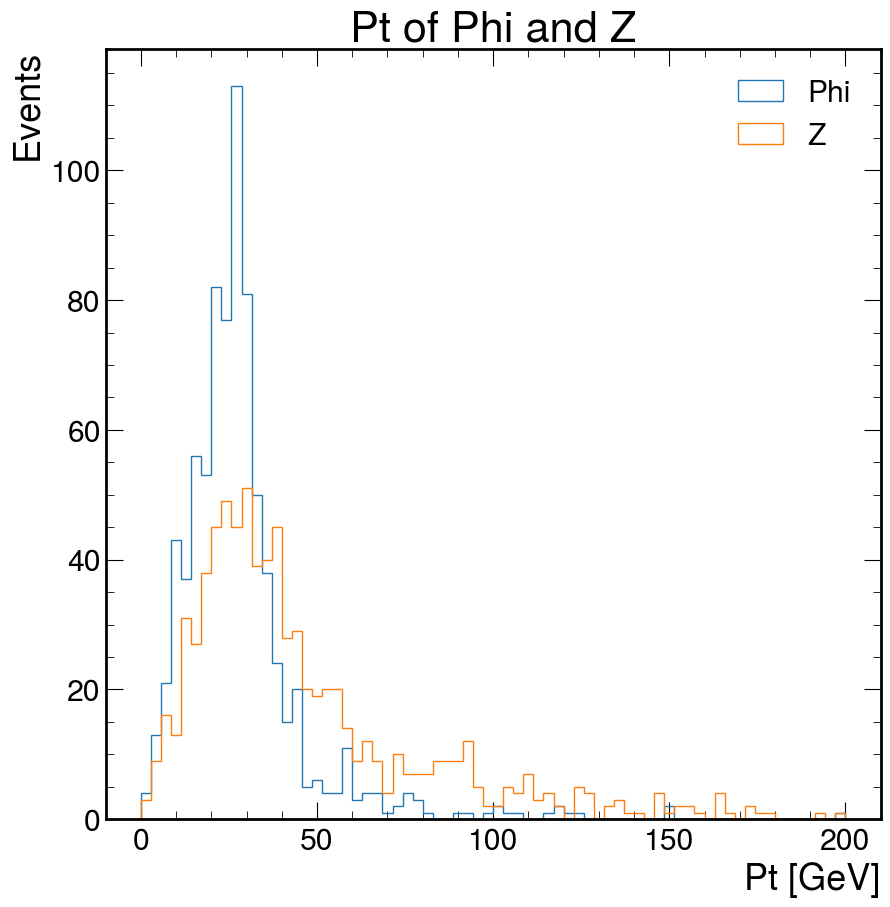

In [74]:
plt.hist(df.Phi_Pt, bins=70, range=(0, 200), histtype='step', label='Phi')
plt.hist(df.Z_Pt, bins=70, range=(0, 200), histtype='step', label='Z')
plt.legend()
plt.xlabel('Pt [GeV]')
plt.ylabel('Events')
plt.title('Pt of Phi and Z')

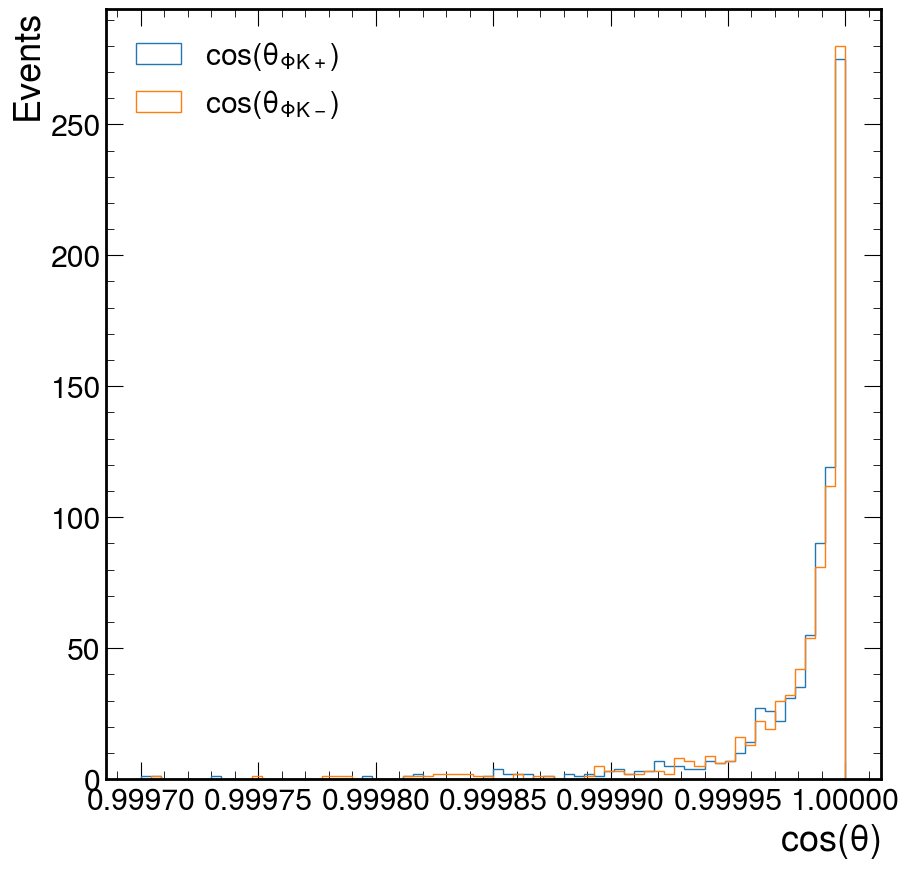

In [75]:
plt.hist(df.ang_lab_Kp_Phi, bins=70, range=(0.9997, 1), histtype='step', label='cos($\\theta_{{\Phi}{K+}}$)')
plt.hist(df.ang_lab_Km_Phi, bins=70, range=(0.9997, 1), histtype='step', label='cos($\\theta_{{\Phi}{K-}}$)')
plt.xlabel('cos($\\theta$)')
plt.ylabel('Events')
plt.legend()
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

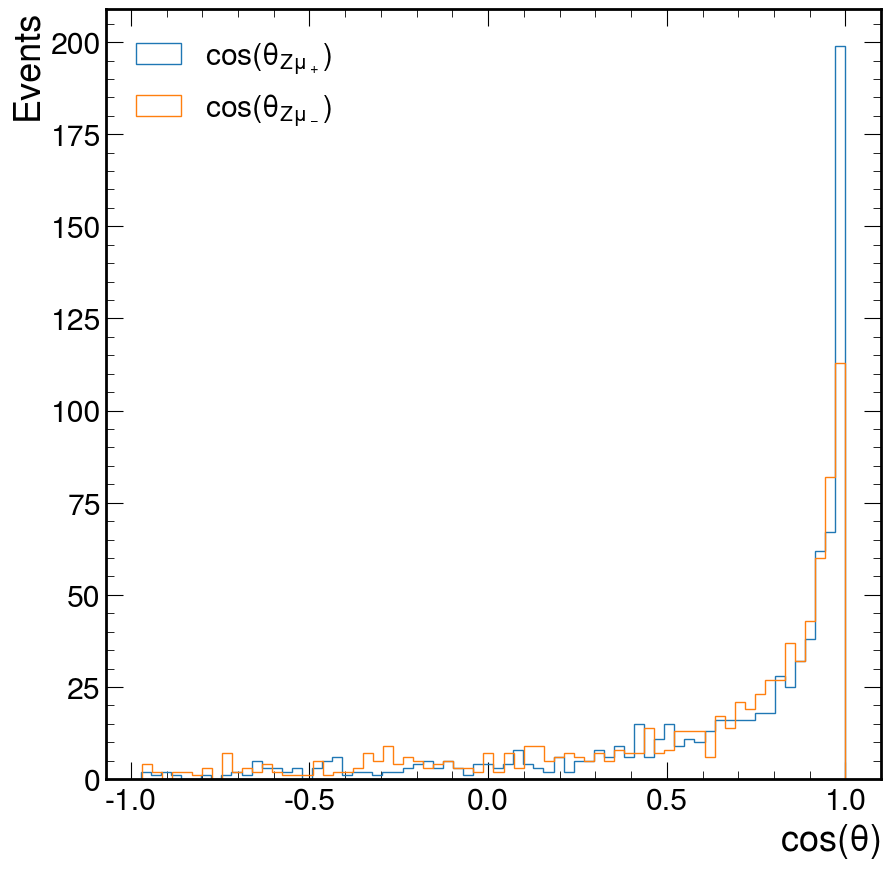

In [76]:
plt.hist(df.ang_lab_muP_Z, bins=70, histtype='step', label='cos($\\theta_{{Z}{\mu_+}}$)')
plt.hist(df.ang_lab_muM_Z, bins=70, histtype='step', label='cos($\\theta_{{Z}{\mu_-}}$)')
plt.xlabel('cos($\\theta$)')
plt.ylabel('Events')
plt.legend()
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

In [77]:
# Boosted to Higgs frame

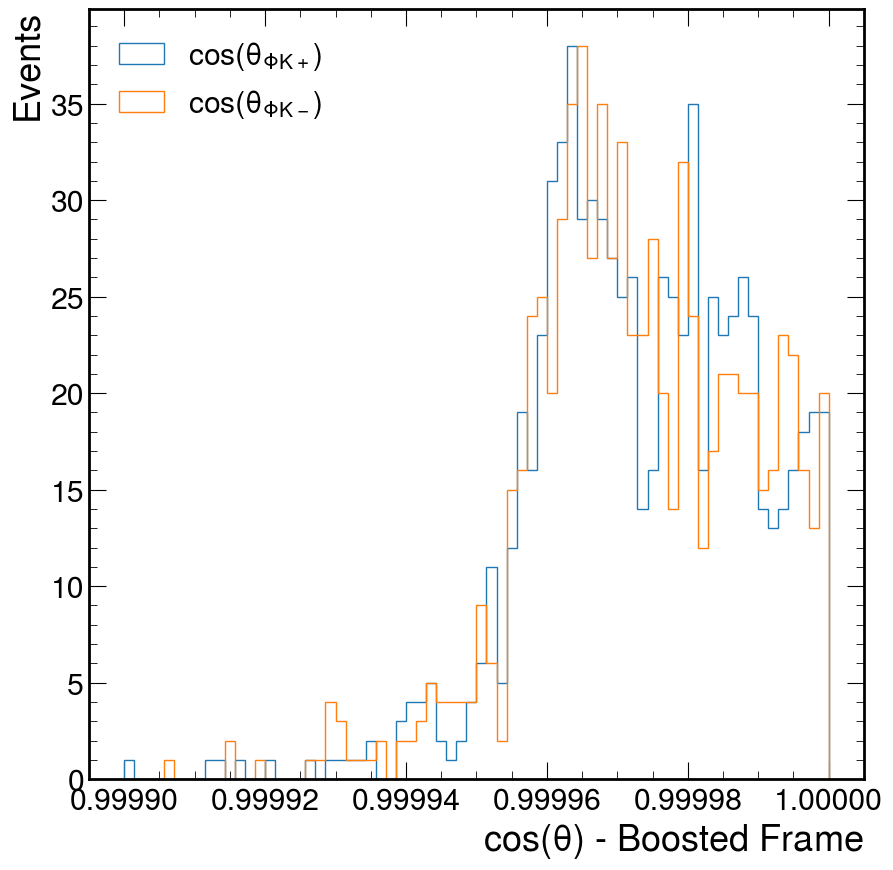

In [78]:
plt.hist(df.ang_Hf_Kp_Phi, bins=70, range=(0.9999, 1), histtype='step', label='cos($\\theta_{{\Phi}{K+}}$)')
plt.hist(df.ang_Hf_Km_Phi, bins=70, range=(0.9999, 1), histtype='step', label='cos($\\theta_{{\Phi}{K-}}$)')
plt.xlabel('cos($\\theta$) - Boosted Frame')
plt.ylabel('Events')
plt.legend()
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

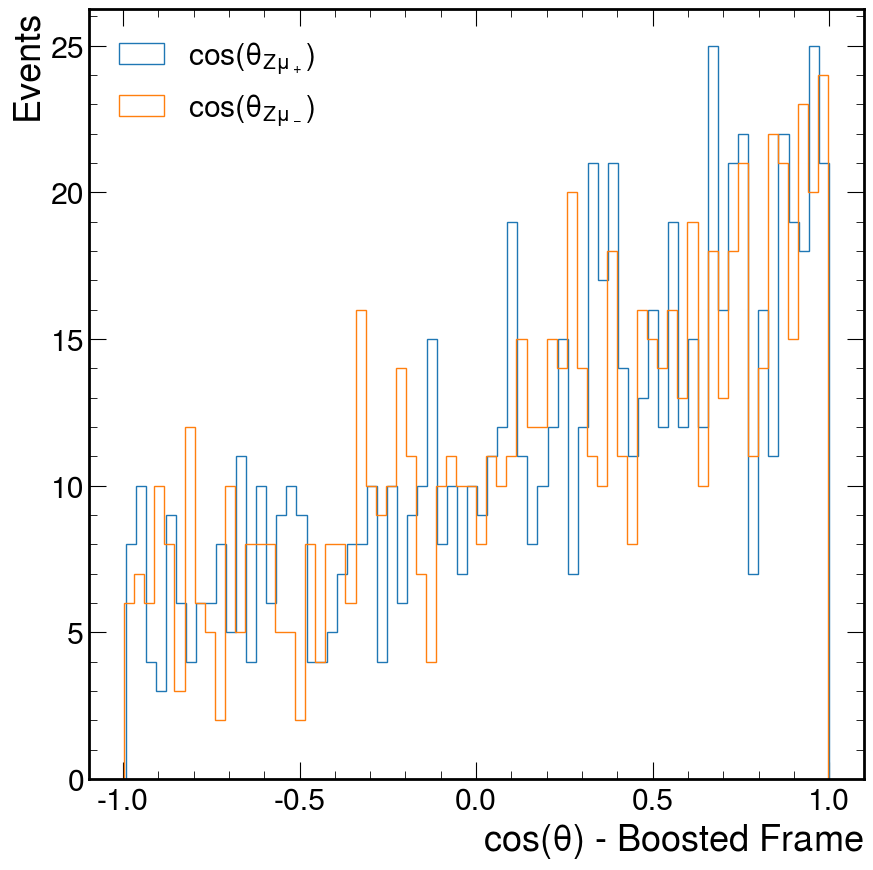

In [79]:
plt.hist(df.ang_Hf_muP_Z, bins=70, histtype='step', label='cos($\\theta_{{Z}{\mu_+}}$)')
plt.hist(df.ang_Hf_muM_Z, bins=70, histtype='step', label='cos($\\theta_{{Z}{\mu_-}}$)')
plt.xlabel('cos($\\theta$) - Boosted Frame')
plt.ylabel('Events')
plt.legend()
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)